In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.47'

In [2]:
from platform import python_version

print(python_version())

3.9.13


In [3]:
df=pd.read_excel('Batch_processing_TC.xlsx')
df.head()

,T_c_Homog,Sample
0,30,Test1
1,25,Test2
2,20,Test3
3,15,Test4
4,10,Test5


In [4]:
pf.calculate_CO2_density_homog_T(T_C=-5)

,Liq_gcm3,Gas_gcm3,T_C
0,0.956209,0.08336,-5


In [5]:
pf.calculate_CO2_density_homog_T(T_C=df['T_c_Homog'], Sample_ID=df['Sample'])

,Liq_gcm3,Gas_gcm3,T_C,Sample_ID
0,0.593279,0.345049,30,Test1
1,0.710506,0.242742,25,Test2
2,0.773388,0.194205,20,Test3
3,0.821206,0.160728,15,Test4
4,0.861120,0.135155,10,Test5
5,0.896029,0.114622,5,Test6
6,0.927432,0.097647,0,Test7
7,0.956209,0.083360,-5,Test8
8,0.982928,0.071186,-10,Test9
9,1.007982,0.060728,-15,Test10


## Monte-Carlo simulations

In [6]:
Av_outputs, All_outputs=pf.propagate_microthermometry_uncertainty(T_C=df['T_c_Homog'], 
        Sample_ID=df['Sample'],
        error_T_C=0.3, N_dup=50, 
        error_dist_T_C='uniform', error_type_T_C='Abs', len_loop=1)

14


In [9]:
Av_outputs.head()

,Sample_ID,Mean_density_Gas_gcm3,Std_density_Gas_gcm3,Mean_density_Liq_gcm3,Std_density_Liq_gcm3,error_T_C
0,Test1,0.346435,0.007995,0.591951,0.008530,0.3
1,Test2,0.242510,0.002105,0.710780,0.002602,0.3
2,Test3,0.194615,0.001195,0.772825,0.001633,0.3
3,Test4,0.160896,0.001026,0.820961,0.001532,0.3
4,Test5,0.135221,0.000840,0.861014,0.001370,0.3


Text(0, 0.5, '% error, 0.3 C uncertainty')

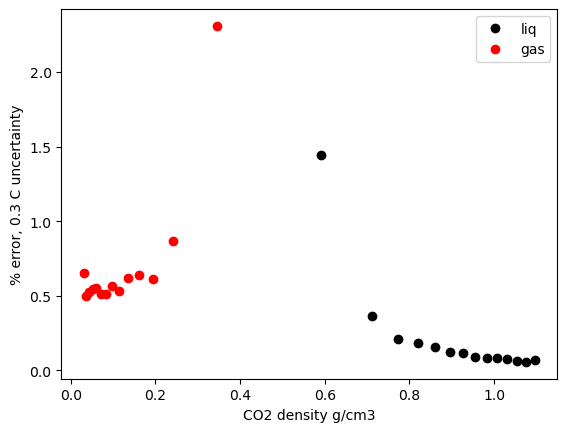

In [15]:
plt.plot(Av_outputs['Mean_density_Liq_gcm3'], 
         100*Av_outputs['Std_density_Liq_gcm3']/Av_outputs['Mean_density_Liq_gcm3'],
         'ok', label='liq')
plt.plot(Av_outputs['Mean_density_Gas_gcm3'], 
         100*Av_outputs['Std_density_Gas_gcm3']/Av_outputs['Mean_density_Gas_gcm3'],
         'or', label='gas')
plt.legend()
plt.xlabel('CO2 density g/cm3')
plt.ylabel('% error, 0.3 C uncertainty')

(array([12.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.05278771, 0.31683508, 0.58088245, 0.84492982, 1.10897719,
        1.37302456, 1.63707193, 1.9011193 , 2.16516667, 2.42921404,
        2.69326141]),
 <BarContainer object of 10 artists>)

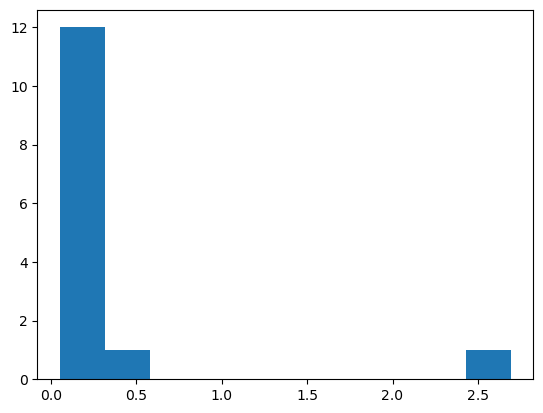

In [16]:
plt.hist(100*Av_outputs['Std_density_Liq_gcm3']/Av_outputs['Mean_density_Liq_gcm3'])

In [17]:
T_MC=propagate_microthermometry_uncertainty(T_C=5)
plt.hist(T_MC)

NameError: name 'propagate_microthermometry_uncertainty' is not defined